In [ ]:
import math
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import table # EDIT: see deprecation warnings below

In [2]:
# u(x;0) = (x + 0.2) * sin(pi * x / 2)
# du/dt(x;0) = 1 + x^2
# u(0;t) = 0
# u(1;t) = 1.2 * (t + 1)
# x in [0;1]
# h = 0.1
# t in [0;0.5]

In [3]:
h = 0.1
l = 1
N = round(l / h) + 1

t_0 = 0.5
dt = 0.01
K = round(t_0 / dt) + 1

In [4]:
x_i = lambda i: i * h
t_j = lambda j: j * dt

In [5]:
U = [[None for i in range(N)] for k in range(K)]

In [6]:
# set u(x;0) = (x + 0.2) * sin(pi * x / 2)
f = lambda x: (x + 0.2) * math.sin(math.pi * x / 2)

for i in range(len(U[0])):
    U[0][i] = f(x_i(i))

In [7]:
# set u(0;t) = 0

for i in range(len(U)):
    U[i][0] = 0

In [8]:
# set u(1;t) = 1.2 * (t + 1)

for i in range(len(U)):
    U[i][-1] = 1.2 * (t_j(i) + 1)

In [9]:
f_1 = lambda x: (x + 0.2) * math.sin(math.pi * x / 2)
f_2 = lambda x: 1 + x ** 2

for i in range(1, len(U[0]) - 1):
    U[1][i] = f_1(x_i(i)) + f_2(x_i(i)) * dt + (dt ** 2) / (2 * h ** 2) * (f_1(x_i(i+1)) - 2 * f_1(x_i(i)) + f_1(x_i(i-1)))

In [10]:
for k in range(1, K-1):
    for i in range(1, N-1):
        U[k+1][i] = (dt ** 2) / (h ** 2) * (U[k][i+1] - 2 * U[k][i] + U[k][i-1]) + 2 * U[k][i] - U[k-1][i]

Text(0.5, 0.98, 'Зависимость перемещения от координаты и времени')

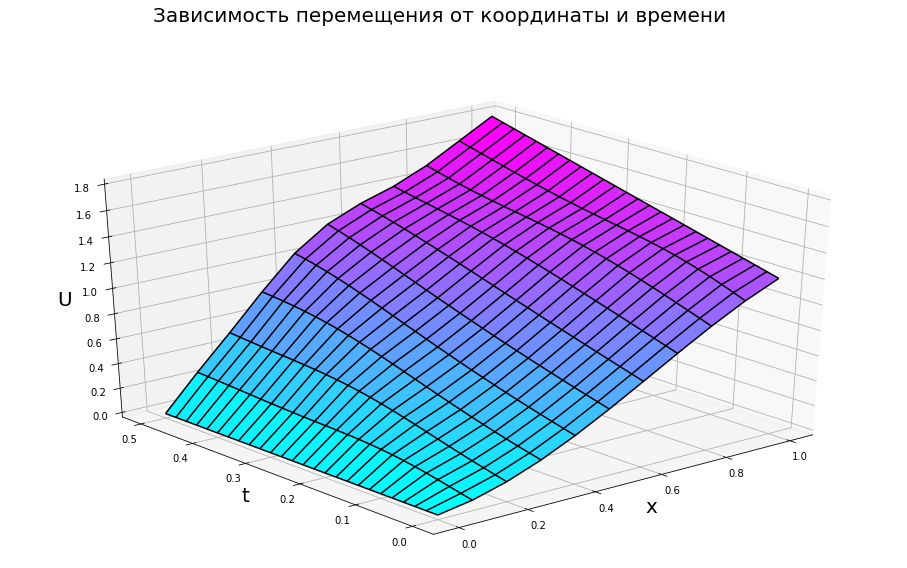

In [11]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, l + h/10, h)
t = np.arange(0, t_0 + dt/10, dt)
X, t = np.meshgrid(X, t)
U = np.array(U)

# Plot the surface.
ax.plot_surface(X, t, np.array((U)), cmap='cool')
ax.plot_wireframe(X, t, np.array((U)), color='black')

ax.set_xlabel("x", fontsize=20)
ax.set_ylabel("t", fontsize=20)
ax.set_zlabel("U", fontsize=20)
ax.view_init(30, 230)

fig.suptitle('Зависимость перемещения от координаты и времени', fontsize=20)

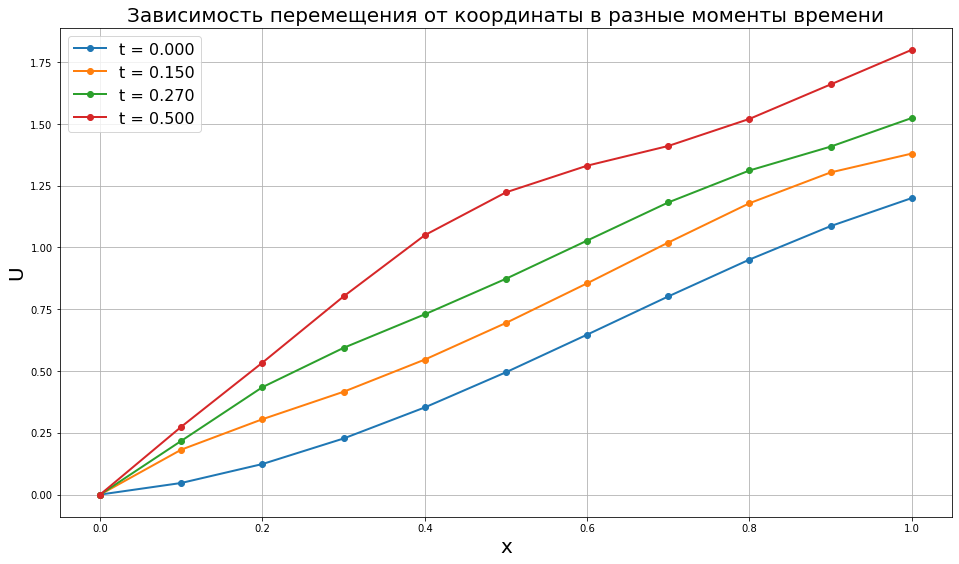

In [12]:
fig = plt.figure(figsize=(16, 9))
plt.grid()
plt.title('Зависимость перемещения от координаты в разные моменты времени', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('U', fontsize=20)

x = np.arange(0, l + h/10, h)

y1 = np.array(U[0])
plt.plot(x, y1, linewidth=2, label='t = %.3f' % t_j(0), linestyle='-', marker='o')

y2 = np.array(U[15])
plt.plot(x, y2, linewidth=2, label='t = %.3f' % t_j(15), linestyle='-', marker='o')

y3 = np.array(U[27])
plt.plot(x, y3, linewidth=2, label='t = %.3f' % t_j(27), linestyle='-', marker='o')

y4 = np.array(U[50])
plt.plot(x, y4, linewidth=2, label='t = %.3f' % t_j(50), linestyle='-', marker='o')

plt.legend(fontsize=16)

In [13]:
df = pd.DataFrame(U)

In [19]:
df.to_csv('out.csv')

In [24]:
df.round(3).to_csv('out.csv')

In [25]:
df.round(3)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.047,0.124,0.227,0.353,0.495,0.647,0.802,0.951,1.086,1.200
1,0.0,0.057,0.134,0.238,0.364,0.508,0.661,0.817,0.967,1.104,1.212
2,0.0,0.068,0.145,0.249,0.376,0.520,0.674,0.832,0.984,1.122,1.224
3,0.0,0.078,0.156,0.261,0.388,0.533,0.688,0.846,1.000,1.139,1.236
4,0.0,0.089,0.167,0.272,0.400,0.546,0.702,0.861,1.016,1.156,1.248
5,0.0,0.099,0.179,0.284,0.413,0.559,0.716,0.876,1.031,1.173,1.260
6,0.0,0.109,0.191,0.296,0.425,0.572,0.729,0.890,1.047,1.189,1.272
7,0.0,0.119,0.203,0.309,0.438,0.585,0.743,0.905,1.063,1.204,1.284
8,0.0,0.129,0.215,0.321,0.451,0.598,0.757,0.919,1.078,1.219,1.296
9,0.0,0.138,0.228,0.334,0.464,0.612,0.771,0.934,1.093,1.233,1.308
